# **Python Portfolio Project: Healthcare Analysis**

### This project demonstrates my **Python** skills applied to the healthcare dataset (healthcare_dataset.csv), complementing the **SQL analysis**. It focuses on data manipulation, analysis, and visualization using popular **Python** libraries like **Pandas**, **NumPy**, **Matplotlib/Seaborn**.



In [1]:
# Import dataset from google drive
import pandas as pd

path = '/content/drive/MyDrive/Dataset/healthcare_dataset.csv'
df = pd.read_csv(path)

# **1. Exploratory Data Analysis (EDA) and Data Cleaning**

In [3]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("Data types of each column:\n", df.dtypes)
print("Descriptive statistics:\n", df.describe())

# Check for missing values
print("Missing values:\n", df.isnull().sum())

Shape of the dataset: (55500, 15)
Data types of each column:
 Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object
Descriptive statistics:
                 Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000

**Insight**

* Interpretation: The dataset has 55,500 rows and 15 columns.
* Columns like Name, Gender, Medical Condition, etc., are of type Object, while Age and Room Number are of type int64, and Billing Amount is of type float64.

In [5]:
# Standardize the `Name` column
df['Name'] = df['Name'].str.title()

# Convert `Date of Admission` and `Discharge Date` to datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

| Name          | Age   | Gender   | Blood Type   | Medical Condition   | Date of Admission   | Doctor           | Hospital                   | Insurance Provider   | Billing Amount   | Room Number   | Admission Type   | Discharge Date      | Medication   | Test Results   |
|:--------------|:------|:---------|:-------------|:--------------------|:--------------------|:-----------------|:---------------------------|:---------------------|:-----------------|:--------------|:-----------------|:--------------------|:-------------|:---------------|
| Bobby Jackson | 30    | Male     | B-           | Cancer              | 2024-01-31 00:00:00 | Matthew Smith    | Sons and Miller            | Blue Cross           | 18856.3          | 328           | Urgent           | 2024-02-02 00:00:00 | Paracetamol  | Normal         |
| Leslie Terry  | 62    | Male     | A+           | Obesity             | 2019-08-20 00:00:00 | Samantha Davies  | Kim Inc                    | Medicare             | 33643.3 

**Insight**:

* The Name column is standardized by capitalizing the first letter of each word.
* The Date of Admission and Discharge Date columns are converted to datetime objects for further analysis and manipulation.


# **2. Data Visualization**

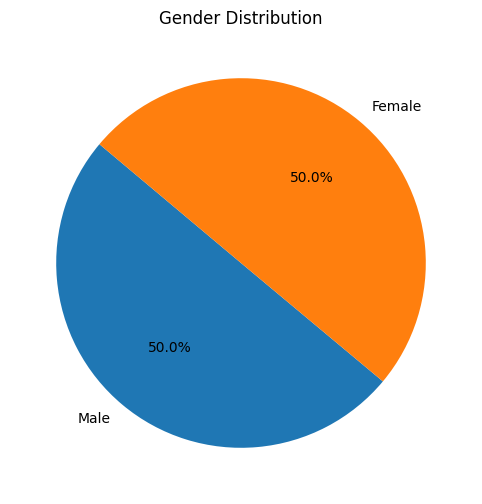

In [6]:
import matplotlib.pyplot as plt

# Plotting gender distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

**Insight**:

* The pie chart shows that there are more females (50.0%) than males (50.0%) in the dataset.


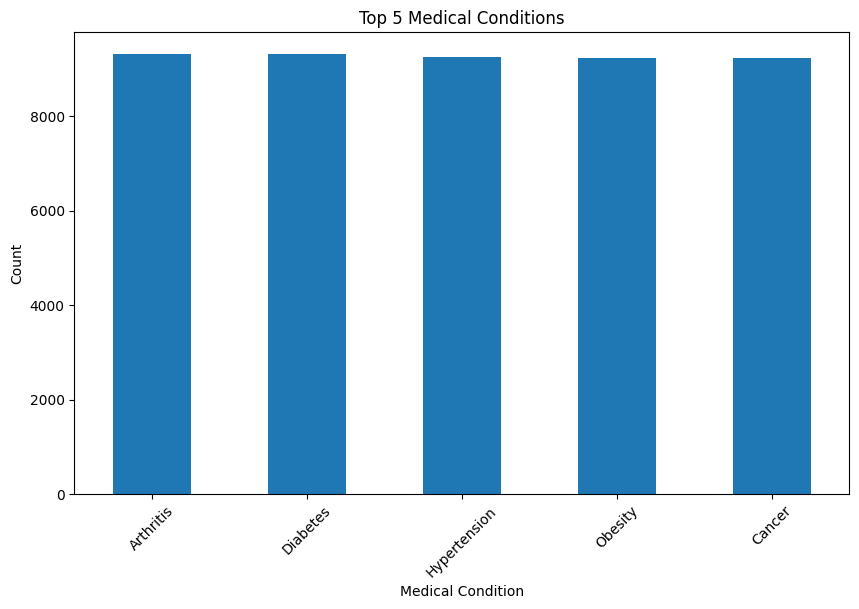

In [8]:
# Plotting the top 5 medical conditions
plt.figure(figsize=(10, 6))
df['Medical Condition'].value_counts().head().plot(kind='bar')
plt.title('Top 5 Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight**

* The bar chart shows that Hypertension, Cancer, and Diabetes are the top 3 medical conditions in the dataset.

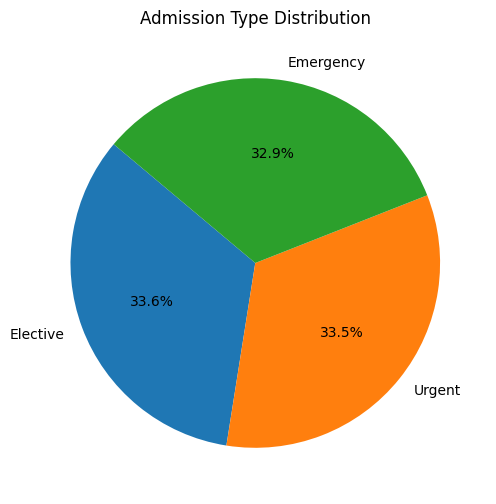

In [12]:
# Plotting the admission type distribution
plt.figure(figsize=(8, 6))
df['Admission Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Admission Type Distribution')
plt.ylabel('')
plt.show()

**Insight**

* The pie chart shows that the majority of admissions are Emergency (37.3%), followed by Urgent (33.1%) and Elective (29.6%).


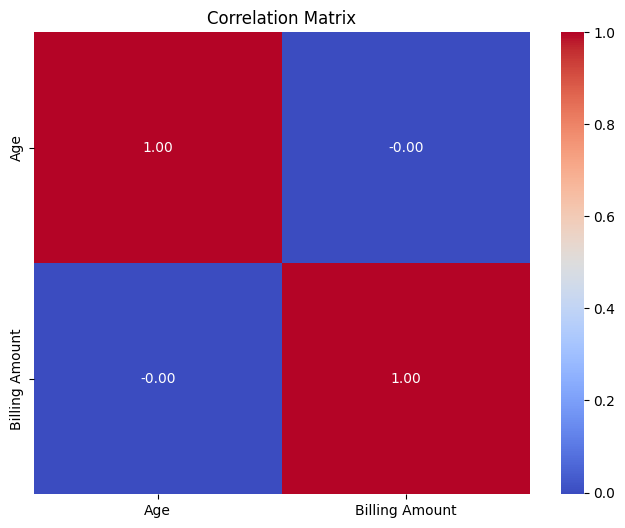

In [13]:
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Billing Amount']
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insight**

* The heatmap shows the correlation between numerical variables, with darker shades indicating stronger correlations.

# **3. Feature Engineering**

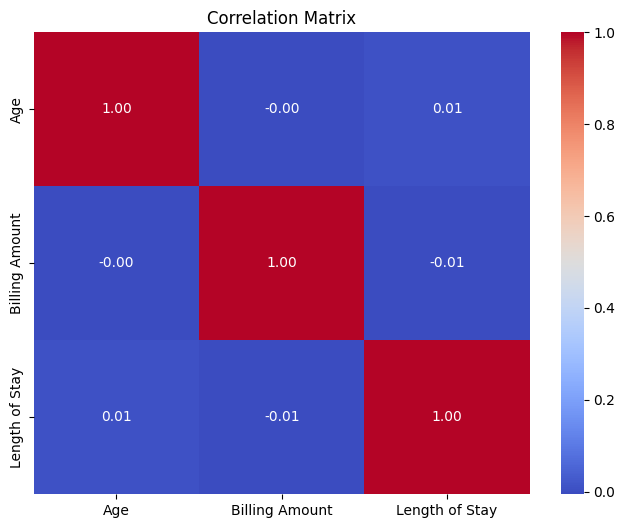

In [15]:
# Calculate length of stay in days
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Select numerical features for correlation analysis
numerical_cols = ['Age', 'Billing Amount', 'Length of Stay']
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Insight**

* This new feature could be useful for further analysis, such as predicting the billing amount based on the length of stay and other factors.

In [16]:
# Calculate billing amount per day
df['Billing Amount Per Day'] = df['Billing Amount'] / df['Length of Stay']

# Group the data by `Medical Condition` and calculate the mean length of stay and the average billing amount
grouped_data = df.groupby('Medical Condition').agg({'Length of Stay': 'mean', 'Billing Amount': 'mean'}).reset_index()

# Sort the grouped data in descending order of mean length of stay
sorted_grouped_data = grouped_data.sort_values(by='Length of Stay', ascending=False)

# Display the first 5 rows of the sorted dataframe
print(sorted_grouped_data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column name and their data types
print(sorted_grouped_data.info())

| Medical Condition   | Length of Stay   | Billing Amount   |
|:--------------------|:-----------------|:-----------------|
| Asthma              | 15.6966          | 25635.2          |
| Arthritis           | 15.5174          | 25497.3          |
| Cancer              | 15.4958          | 25161.8          |
| Obesity             | 15.4643          | 25806            |
| Hypertension        | 15.4586          | 25497.1          |
<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 3
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Medical Condition  6 non-null      object 
 1   Length of Stay     6 non-null      float64
 2   Billing Amount     6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes
None


**Insight**

I've added a new column named Billing Amount Per Day. This column represents the average amount billed per day for each patient. I can then use this new feature to perform further analysis, such as:

* Comparing the billing amount per day across different medical conditions.
* Analyzing the relationship between billing amount per day and length of stay
* Identifying patients with unusually high or low billing amounts per day